# BPML - Submission 1
Dataset yang dgunakan adalah data Sentiment positif dan negatif dari twitter.
Dataset ini terdiri dari 1600000 data.
Terdapat 6 Variabel pada dataset namun pada submission ini hanya menggunakan 2 variabel yaitu Sentiment(Positif atau Negatif) dan isi twitter.
Pada project ini akan diklasifikasikan isi twitter yang bersentimen positif atau negatif

### Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Mengimport dataset menggunakan pandas

In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/sentiment/sentiment.csv', header=None, encoding='ISO-8859-1')

### Menampilkan 5 data terakhir

In [6]:
df.tail()

0  ...                                                  5
1599995  4  ...  Just woke up. Having no school is the best fee...
1599996  4  ...  TheWDB.com - Very cool to hear old Walt interv...
1599997  4  ...  Are you ready for your MoJo Makeover? Ask me f...
1599998  4  ...  Happy 38th Birthday to my boo of alll time!!! ...
1599999  4  ...  happy #charitytuesday @theNSPCC @SparksCharity...

[5 rows x 6 columns]

### Menghapus Kolom yang tidak digunakan
Pada project ini hanya digunakan kolom 0 (sentimen) dan 5 (isi twitter).
Kolom 1,2,3,4 dihapus.

In [7]:
df = df.drop(columns=[1,2,3,4])

### Mengganti isi kolom 0(sentimen)
Nilai pada kolom 0 yaitu 0 (untuk sentimen negatif) dan 4 (untuk sentimen positif)

In [8]:
df[0].replace([0,4], [0,1], inplace=True)

### Membagi data menjadi data training dan data testing

In [9]:
tweets = df[5].values
sentiment = df[0].values

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tweets, sentiment, test_size=0.2)

### Melakukan Tokenizing dan Padding Terhadap data tweets

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='-')
tokenizer.fit_on_texts(tweets)

In [12]:
seq_train = tokenizer.texts_to_sequences(x_train)
seq_test = tokenizer.texts_to_sequences(x_test)

pad_train = pad_sequences(seq_train)
pad_test = pad_sequences(seq_test)

### Model Arsitektur Neural Network

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

nlp_model = Sequential()
nlp_model.add(Embedding(input_dim=10000, output_dim=32))
nlp_model.add(LSTM(64))
nlp_model.add(Dense(512, activation='relu'))
nlp_model.add(Dense(1024, activation='relu'))
nlp_model.add(Dense(512, activation='relu'))
nlp_model.add(Dense(64, activation='relu'))
nlp_model.add(Dense(1, activation='sigmoid'))

nlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 512)               33280     
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6

### Melakukan compile terhadap model
Model arsitektur yang telah dibuat dilakukan compile menggunakan loss function binary_crossntropy (karena classnya hanya 2) dan optimizer adam

In [14]:
nlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Melakukan fitting
Melakukan fitting terhadap model menggunakan data training dan divalidasi menggunakan data testing

In [15]:
num_epochs = 30
nlp_model_history = nlp_model.fit(pad_train, y_train, epochs=num_epochs, validation_data=(pad_test, y_test), batch_size=2048, verbose=1)

Epoch 1/30
625/625 [==============================] - 21s 33ms/step - loss: 0.4425 - accuracy: 0.7905 - val_loss: 0.4134 - val_accuracy: 0.8081
Epoch 2/30
625/625 [==============================] - 20s 32ms/step - loss: 0.4028 - accuracy: 0.8151 - val_loss: 0.4040 - val_accuracy: 0.8145
Epoch 3/30
625/625 [==============================] - 20s 32ms/step - loss: 0.3857 - accuracy: 0.8243 - val_loss: 0.3932 - val_accuracy: 0.8214
Epoch 4/30
625/625 [==============================] - 20s 32ms/step - loss: 0.3737 - accuracy: 0.8307 - val_loss: 0.3933 - val_accuracy: 0.8218
Epoch 5/30
625/625 [==============================] - 20s 32ms/step - loss: 0.3643 - accuracy: 0.8356 - val_loss: 0.3913 - val_accuracy: 0.8227
Epoch 6/30
625/625 [==============================] - 20s 32ms/step - loss: 0.3553 - accuracy: 0.8405 - val_loss: 0.3966 - val_accuracy: 0.8216
Epoch 7/30
625/625 [==============================] - 20s 32ms/step - loss: 0.3473 - accuracy: 0.8448 - val_loss: 0.3973 - val_accuracy:

### Grafik perubahan akurasi terhadap jumlah epoch

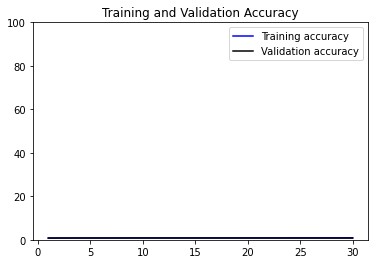

In [20]:
import matplotlib.pyplot as plt
acc = nlp_model_history.history['accuracy']
val_acc = nlp_model_history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.ylim(0, 100)
plt.plot(epochs, acc, 'blue', label='Training accuracy')
plt.plot(epochs, val_acc, 'black', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()